# Prediction Using Unsupervised ML


* prediction of the optimum number of clusters (with visual representation)
* data set: ['Iris'](https://bit.ly/3kXTdox)
* K-means clustering

***Author: Andrijana Zivic***


# Dataset

In [19]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans 


In [20]:
#importing file to google colab
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [26]:
df=pd.read_csv('Iris.csv')
df.head(3) #the first 3 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


Closer look through dataset:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


So dataset contains Id column, which does not provide useful information about the dataset, so it should be dropped. (Same as Species column)

In [ ]:
df.drop("Id", axis=1, inplace=True)

In [40]:
df.drop("Species", axis=1, inplace=True)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# Finding the optimum number of clusters

The goal of the clustering algorithm is to find a partitioning (clustering) of minimal cost. It is often up to the user of the clustering algorithm to choose the parameter **k** that is most suitable for the given clustering problem. in this task it is sufficient to use the "elbow method": if the line chart resembles an arm, then the “elbow” (the point of inflection on the curve, when the sum of the squares within the cluster does not decrease significantly with each iteration) is a good indication that the underlying model fits best at that point.

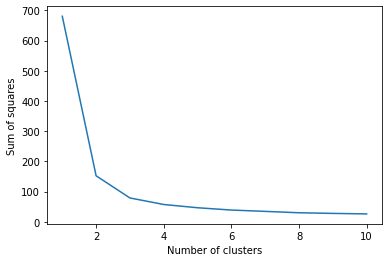

In [49]:
sum = []

#to train a model with various cluster
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 400, n_init = 10, random_state = 30)
    model.fit(df.values)
    sum.append(model.inertia_)
    
# Plotting the results to observe 'The elbow'
plt.plot(range(1, 11), sum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares')
plt.show()

There is an elbow type stucture in the cluster 3. So that is a number of **k**. 

# Creating the classifier

K-means might converge to a point which is not even a local minimum. To improve the results of k-means algorithm, the itterations should be repeated several times with different randomly chosen initial centroids.

In [76]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 400, n_init = 10, random_state = 34)
kmeans = model.fit_predict(x)

# Visualisation

Centroids: 

 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]




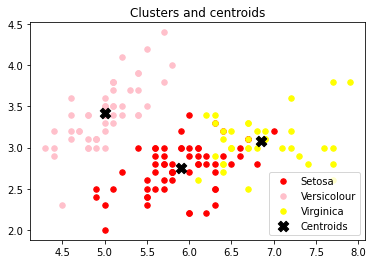

In [86]:
#printing the centroids
print('Centroids: \n\n', model.cluster_centers_)
print('\n')

# Visualising the clusters - on the first two columns
plt.scatter(x[kmeans == 0, 0], x[kmeans == 0, 1], 
            s = 30, c = 'red', label = 'Setosa')
plt.scatter(x[kmeans == 1, 0], x[kmeans == 1, 1], 
            s = 30, c = 'pink', label='Versicolour')
plt.scatter(x[kmeans == 2, 0], x[kmeans == 2, 1],
            s = 30, c = 'yellow', label='Virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 110, c = 'black', label = 'Centroids', marker='X')

plt.title('Clusters and centroids')
plt.legend()
plt.show()